# <center> Welcome to Machine Learning world </center>
---
This is overview machine learning course base on Titanic dataset. This code is designed for
- haven't experience with handling large datasets,
- haven't done much coding,
- are newer to data science.


# <center> Introduction 1: Get started </center>
---
Data Source:
- https://www.kaggle.com/c/titanic

Objective:
- To use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

Train data:
- File name: train.csv
- Detail: Contains the details of a subset of the passengers on board (891 passengers). The values in the second column (**"Survived"**) can be used to determine
whether each passenger survived or not:
 - if it's a "1", the passenger survived.
 - if it's a "0", the passenger died.

Test data:
- File name: test.csv
- Detail: Predict 418 passengers


In [ ]:
# # PyCaret using for Machine Learning
# !pip install pycaret

In [ ]:
# # Pandas-Profiling using for Auto EDA through Preview data
# !pip install pandas-profiling

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")

import plotly.express as px

# init setup
from pycaret.classification import *
# from pandas_profiling import ProfileReport

import string
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv('data/train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [5]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# profile = ProfileReport(df_train, title="Titanic Profiling Report")

In [7]:
# profile

In [8]:
# Name, Carbin, Ticket  ไม่น่ามีผลต่อการรอดชีวิต ดังนั้นจึง drop ออก , cabin / ตู้นอน null เยอะไป

df_train.drop(["Name", "Cabin", "Ticket"], axis = 1, inplace = True)
print(df_train)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [9]:
s = setup(data = df_train, target = "Survived", session_id = 777)

# random session id แต่ละครั้งไม่เหมือนกัน โดยใช้วิธี gradient descent เป็น local optimization ที่บางจุด
# โดยปกติต้อง setup เยอะมากๆเพื่อให้โมเดลเข้าใจว่าเราต้องการเอาอะไรเข้าไปใน model แต่ตอนนี้ใช้ pycaret ช่วย

# data shape เปลี่ยนแปลงเพราะ ตัวแปร category อย่างเช่น เพศ โดยใช้วิธี one hot encoding


,Description,Value
0,Session id,1022
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 8)"
4,Transformed data shape,"(891, 10)"
5,Transformed train set shape,"(623, 10)"
6,Transformed test set shape,"(268, 10)"
7,Numeric features,5
8,Categorical features,2
9,Rows with missing values,20.1%


In [10]:
## Find the best model.
best_model = compare_models(sort = "AUC")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:22:12
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8170,0.0000,0.7239,0.7907,0.7514,0.6076,0.6131,1.7650
knn,K Neighbors Classifier,0.7448,0.0000,0.5764,0.7001,0.6252,0.4371,0.4459,0.0820
nb,Naive Bayes,0.7913,0.0000,0.7362,0.7289,0.7288,0.5597,0.5635,0.0680
dt,Decision Tree Classifier,0.7800,0.0000,0.7147,0.7142,0.7109,0.5337,0.5370,0.0810
svm,SVM - Linear Kernel,0.6693,0.0000,0.4060,0.5563,0.4315,0.2454,0.2659,0.0620
ridge,Ridge Classifier,0.8026,0.0000,0.6904,0.7789,0.7278,0.5744,0.5804,0.1060
rf,Random Forest Classifier,0.8216,0.0000,0.7531,0.7757,0.7626,0.6200,0.6219,0.2380
qda,Quadratic Discriminant Analysis,0.7126,0.0000,0.5672,0.6925,0.5559,0.3726,0.4114,0.1070
ada,Ada Boost Classifier,0.8154,0.0000,0.7486,0.7702,0.7566,0.6082,0.6110,0.2140
gbc,Gradient Boosting Classifier,0.8234,0.0000,0.6980,0.8250,0.7499,0.6156,0.6258,0.2040


In [11]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1022, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [13]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.0000,0.7083,0.6800,0.6939,0.4992,0.4995
1,0.9048,0.0000,0.8750,0.8750,0.8750,0.7981,0.7981
2,0.8889,0.0000,0.8333,0.8696,0.8511,0.7625,0.7630
3,0.8065,0.0000,0.6667,0.8000,0.7273,0.5792,0.5850
4,0.7742,0.0000,0.6667,0.7273,0.6957,0.5167,0.5179
5,0.8548,0.0000,0.7083,0.8947,0.7907,0.6819,0.6928
6,0.7742,0.0000,0.7083,0.7083,0.7083,0.5241,0.5241
7,0.8387,0.0000,0.6667,0.8889,0.7619,0.6437,0.6589
8,0.7742,0.0000,0.6667,0.7273,0.6957,0.5167,0.5179


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
# turning จูนนิ่ง คือการ set ค่าต่างๆในแต่ละ model auto
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7302,0.0000,0.6250,0.6522,0.6383,0.4233,0.4235
1,0.9048,0.0000,0.7917,0.9500,0.8636,0.7914,0.7992
2,0.8571,0.0000,0.7500,0.8571,0.8000,0.6897,0.6934
3,0.7742,0.0000,0.4583,0.9167,0.6111,0.4758,0.5326
4,0.8065,0.0000,0.5417,0.9286,0.6842,0.5582,0.6004
5,0.8387,0.0000,0.6667,0.8889,0.7619,0.6437,0.6589
6,0.7742,0.0000,0.6250,0.7500,0.6818,0.5090,0.5141
7,0.8226,0.0000,0.5417,1.0000,0.7027,0.5916,0.6481
8,0.8226,0.0000,0.6250,0.8824,0.7317,0.6049,0.6249


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [15]:
final = lightgbm

In [16]:
predict_model(final)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7799,0.8487,0.6990,0.7200,0.7094,0.5322,0.5324


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,prediction_label,prediction_score
672,2,male,70.0,0,0,10.500000,S,0,0,0.7788
572,1,male,36.0,0,0,26.387501,S,1,1,0.8798
658,2,male,23.0,0,0,13.000000,S,0,0,0.9953
727,3,female,NaN,0,0,7.737500,Q,1,1,0.7808
506,2,female,33.0,0,2,26.000000,S,1,1,0.9957
...,...,...,...,...,...,...,...,...,...,...
655,2,male,24.0,2,0,73.500000,S,0,0,0.9845
282,3,male,16.0,0,0,9.500000,S,0,0,0.7627
367,3,female,NaN,0,0,7.229200,C,1,1,0.6146
579,3,male,32.0,0,0,7.925000,S,1,1,0.7504


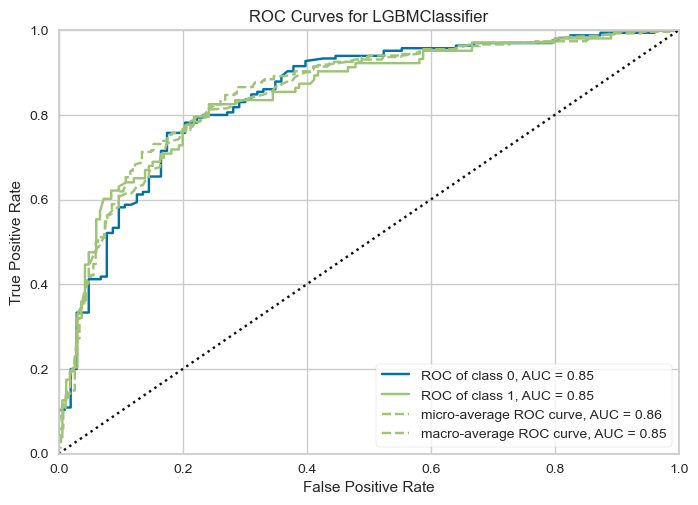

In [17]:
plot_model(final,plot="auc")

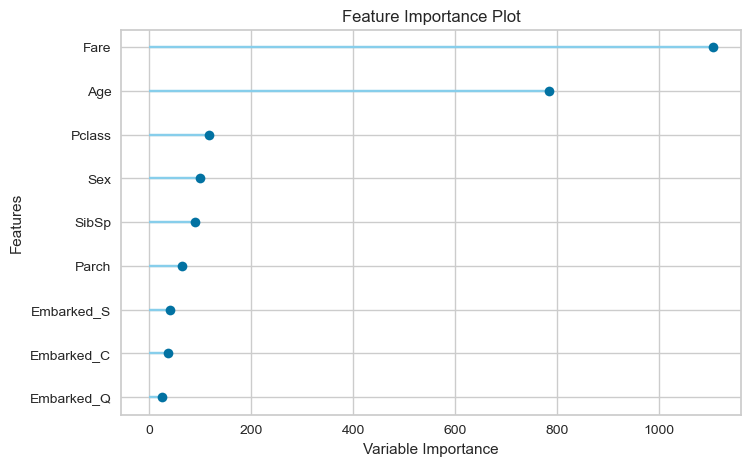

In [18]:
plot_model(final,plot="feature")

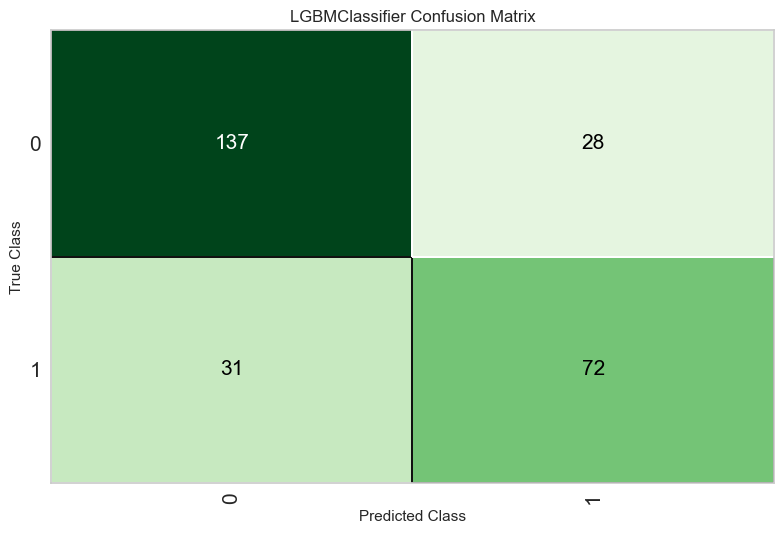

In [19]:
plot_model(final,plot="confusion_matrix")